# <div style="display:fill;border-radius:5px;background-color:#676F9F;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#F1EFF5;overflow:hidden;margin:0;font-size:150%;font-style: Helvetica;text-align:center"><b></b>WHAT IF DOCTOR🧑‍⚕️ PREPARES AN AI MODEL??🤔</p></div>

In this notebook,lets explore our dataset with the nice visuals....

## <font color='#4287f5'>Importing necessary libraries...</font>

In [1]:
import pandas as pd                       # library for data manipulation (data cleaning,analysing...)
import numpy as np                        # library for numerical computation
import matplotlib.pyplot as plt           # library for data visualization which is built on NumPy arrays
%matplotlib inline
import seaborn as sns                     # library for data visualization built on top of matplotlib and 
                                          # closely integrated with pandas data structures in Python.

import random

import warnings                           # to avoid warning flash
warnings.filterwarnings('ignore')

# Other libraries will be imported in the following steps as and when required.... 

In [2]:
#Load the dataset which we have created previously......
df = pd.read_csv(r"D:\DSF\PROJECTPRO\MEDICAL_PROJECTS\3.HEPATIC_DISEASES\jaundice.csv")

In [3]:
df

ID  age  sex  Conjugated_Bilirubin_count  Unconjugated_Bilirubin_count  \
0       0   49    0                        2.72                          4.01   
1       1   42    1                        1.62                          8.55   
2       2   50    0                        9.67                          6.43   
3       3   26    0                        0.64                         10.22   
4       4   52    0                        1.98                          6.09   
..    ...  ...  ...                         ...                           ...   
995   995   55    0                        8.96                          7.27   
996   996   43    1                        9.44                          7.80   
997   997   42    0                        0.31                          2.50   
998   998   54    1                        2.09                          4.83   
999  1000   37    1                        0.35                         10.31   

     Total_Bilirubin_count  Conjugated/Total_bilirubin_Ratio  urine_bilirubin  \
0                     6.73                              40.4                1   
1                    10.17                              15.9                1   
2                    16.10                              60.1                2   
3                    10.86                               5.9                1   
4                     8.07                              24.5                1   
..                     ...                               ...              ...   
995                  16.23                              55.2                2   
996                  17.24                              54.8                2   
997                   2.81                              11.0                0   
998                   6.92                              30.2                1   
999                  10.66                               3.3                0   

     urine_urobilinogen  fecal_stercobilinogen  urine_bile_salts  AST  ALT  \
0                     1                      1                 1  141  193   
1                     1                      1                 1  133  191   
2                     2                      0                 2   75   73   
3                     1                      1                 1  174  114   
4                     1                      1                 1  153  114   
..                  ...                    ...               ...  ...  ...   
995                   2                      0                 2  109   42   
996                   2                      0                 2   58   45   
997                   0                      2                 0   23   19   
998                   1                      1                 1  120   94   
999                   0                      2                 0   33    3   

     ALP  Serum_albumin  urine_color  stool_color        Hb%  Heart_rate  \
0    183           1.55            1            0   9.776846          62   
1    257           3.01            1            0  10.419697          70   
2    902           4.95            2            1  13.307444          57   
3    186           2.83            1            0   9.250229          72   
4    290           2.07            1            0   9.737639          66   
..   ...            ...          ...          ...        ...         ...   
995  647           4.28            2            1  12.129707          56   
996  869           3.86            2            1  11.641941          57   
997   42           4.40            0            2   5.579198          99   
998  256           3.43            1            0   8.199968          69   
999  107           5.00            0            2   7.404115          87   

     Diagnosis  
0            2  
1            2  
2            3  
3            2  
4            2  
..         ...  
995          3  
996          3  
997          1  
998          2  
999          1  

[1000 

In [4]:
df.columns

Index(['ID', 'age', 'sex', 'Conjugated_Bilirubin_count',
       'Unconjugated_Bilirubin_count', 'Total_Bilirubin_count',
       'Conjugated/Total_bilirubin_Ratio', 'urine_bilirubin',
       'urine_urobilinogen', 'fecal_stercobilinogen', 'urine_bile_salts',
       'AST', 'ALT', 'ALP', 'Serum_albumin', 'urine_color', 'stool_color',
       'Hb%', 'Heart_rate', 'Diagnosis'],
      dtype='object')

In [5]:
df.shape

(1000, 20)

## <font color='#4287f5'>Lets start with the nice histograms...</font>

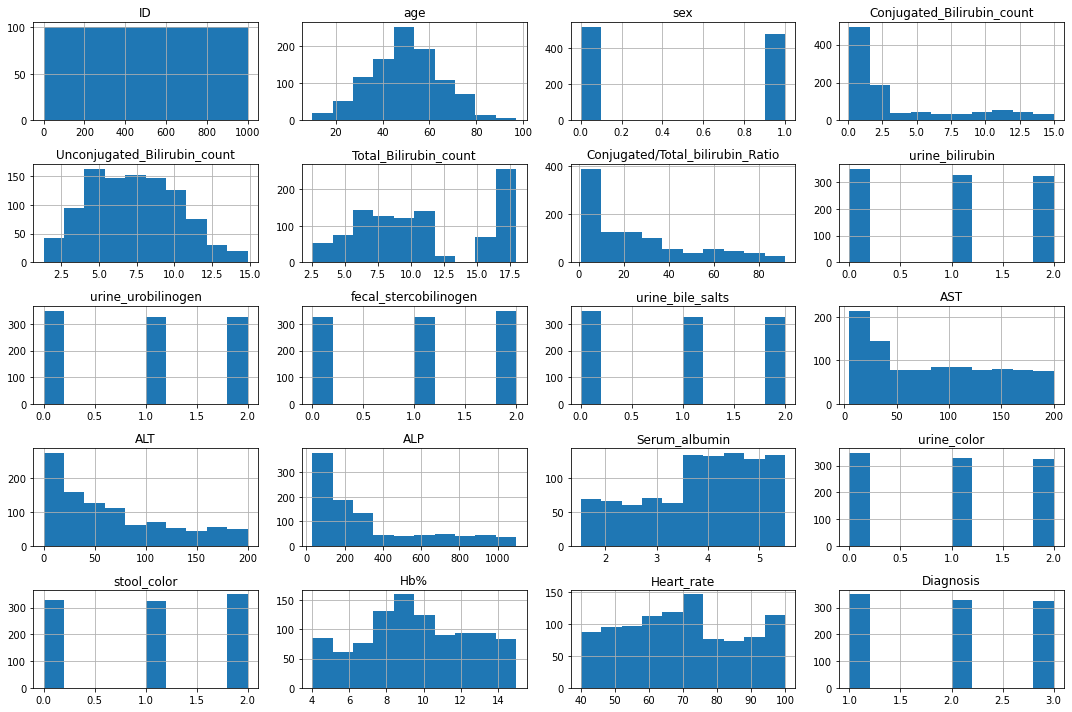

In [6]:
%matplotlib inline
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

* Among the continous features, except for the age, none of the feature values are normally distributed. Most of those are either left or right skewed features. But, in this project, I am thinking of modelling Tree based models and therefore, I am not worried about the distribution of the values.
* In the bottom right plot, we can see that there's no CLASS IMBALANCE.

I am not satisfied with the above visuals. Lets try the same with seaborn library

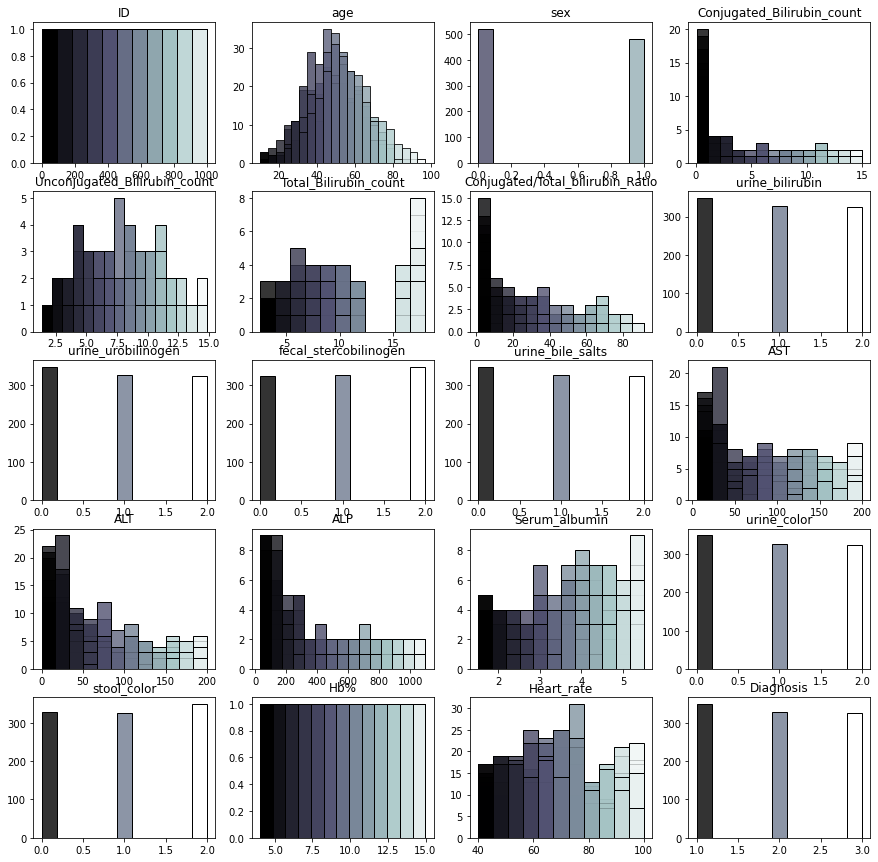

In [10]:
# Lets create histogram for each features.. 

# create a subplot of 5 x 4
data = df
plt.subplots(5,4,figsize=(15,15))


# Plot a histplot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(5,4,idx+1)
    sns.histplot(data, x = col, hue = col, legend=False, palette = 'bone',alpha=0.8)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(col)

plt.subplot(5,4,20).set_visible(True)
plt.show()

In [8]:
# Lets get the percentage of 'Outcome' class...

def get_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

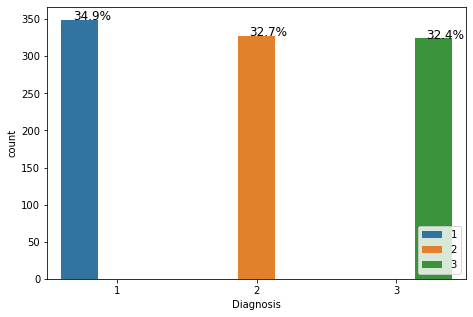

In [16]:
plt.figure(figsize=(7.5,5))
ax = sns.countplot(x='Diagnosis',data=df,hue = 'Diagnosis')
plt.legend(loc = 'lower right')
plt.xlabel('Diagnosis')
plt.ylabel('count')

get_percentage(ax,data.Diagnosis)

Perfect!!!  No class imbalance....

###   Lets plot the <b><u>distribution plot</b></u> to find the difference in distribution between the three classes...

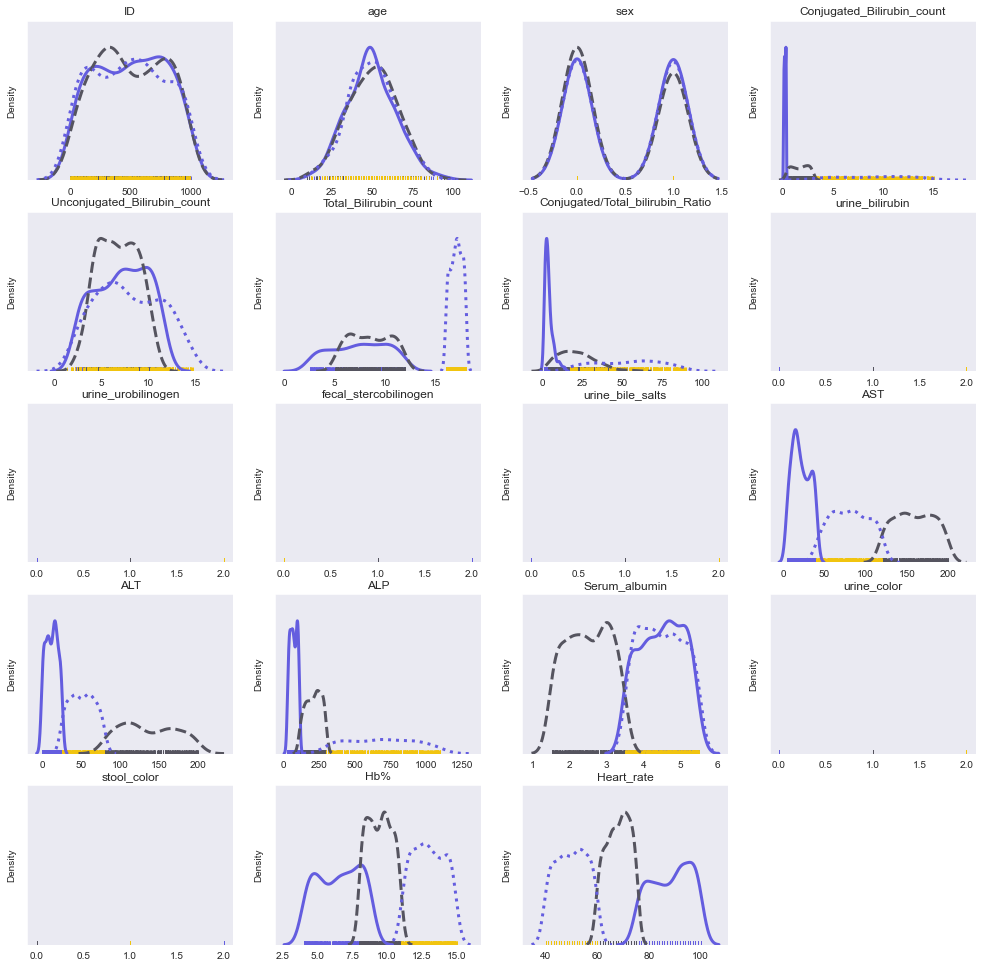

In [27]:
# create a subplot of 5 x 4
sns.set_style('dark')
plt.subplots(5,4,figsize=(17,17))


# Plot a density plot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(5,4,idx+1)
    ax.yaxis.set_ticklabels([])

    sns.distplot(data.loc[data.Diagnosis == 1][col],hist=False, axlabel= False,rug=True,rug_kws={"color": "#645DDF"},
                  kde_kws={"linestyle":'-',"color": "#645DDF", "lw": 3, "label": "Pre-hepatic_jaundice"},)

    sns.distplot(data.loc[data.Diagnosis == 2][col],hist=False, axlabel= False,rug=True,rug_kws={"color": "#55545F"},
                    kde_kws={"linestyle":'--',"color": "#55545F", "lw": 3, "label": "Hepatic_jaundice"},)

    sns.distplot(data.loc[data.Diagnosis == 3][col],hist=False, axlabel= False,rug=True,rug_kws={"color": "#F1C40F"},
                  kde_kws={"linestyle":':',"color": "#645DDF", "lw": 3, "label": "Obstructive_jaundice"},)
    
    ax.set_title(col)

plt.subplot(5,4,20).set_visible(False)
plt.show()

Except for ID,age and sex, all other plots of features have unique distributions of classes so that diagnosis can be easily made by the model...

###  Lets visualize the distribution of variables with <u>boxplot</u> to see the outliers..

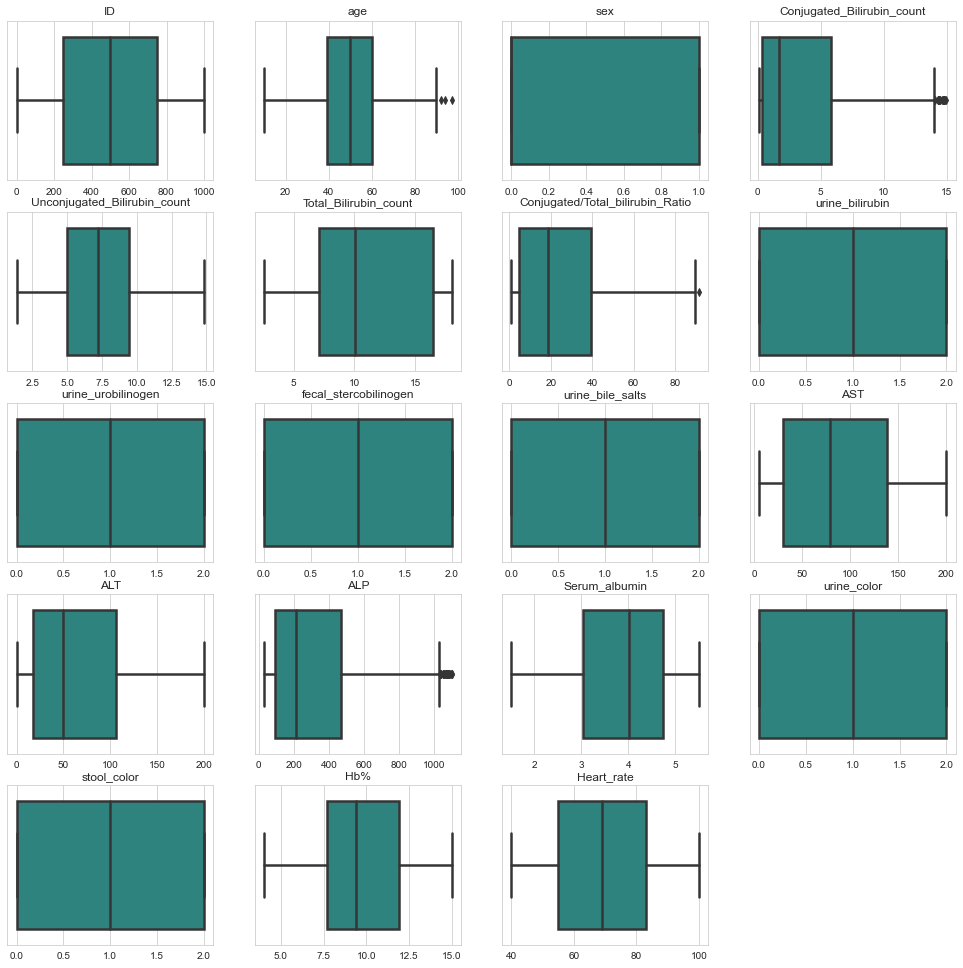

In [28]:
# create a subplot of 5 x 4
sns.set_style('whitegrid')
plt.subplots(5,4,figsize=(17,17))


# Plot a boxplot for each variable

for idx, col in enumerate(data.columns):
    ax = plt.subplot(5,4,idx+1)
    ax.yaxis.set_ticklabels([])

    sns.boxplot(x = col, data = df, hue = col, palette = 'viridis',linewidth=2.5)
    ax.set_xlabel(None)

    ax.set_title(col)

plt.subplot(5,4,20).set_visible(False)
plt.show()

Negligible Outliers are detected for 'age','Conjugated_bilirubin','Conjugated/Total_bilirubin_Ratio' and 'ALP' columns. So,lets keep them as it is...

### Lets create scatterplot between all variables by using <U>PAIRPLOT</U>

For convenience(for a good visibility), I have created two pairplots by selecting two lists of features....

In [29]:
df.columns

Index(['ID', 'age', 'sex', 'Conjugated_Bilirubin_count',
       'Unconjugated_Bilirubin_count', 'Total_Bilirubin_count',
       'Conjugated/Total_bilirubin_Ratio', 'urine_bilirubin',
       'urine_urobilinogen', 'fecal_stercobilinogen', 'urine_bile_salts',
       'AST', 'ALT', 'ALP', 'Serum_albumin', 'urine_color', 'stool_color',
       'Hb%', 'Heart_rate', 'Diagnosis'],
      dtype='object')

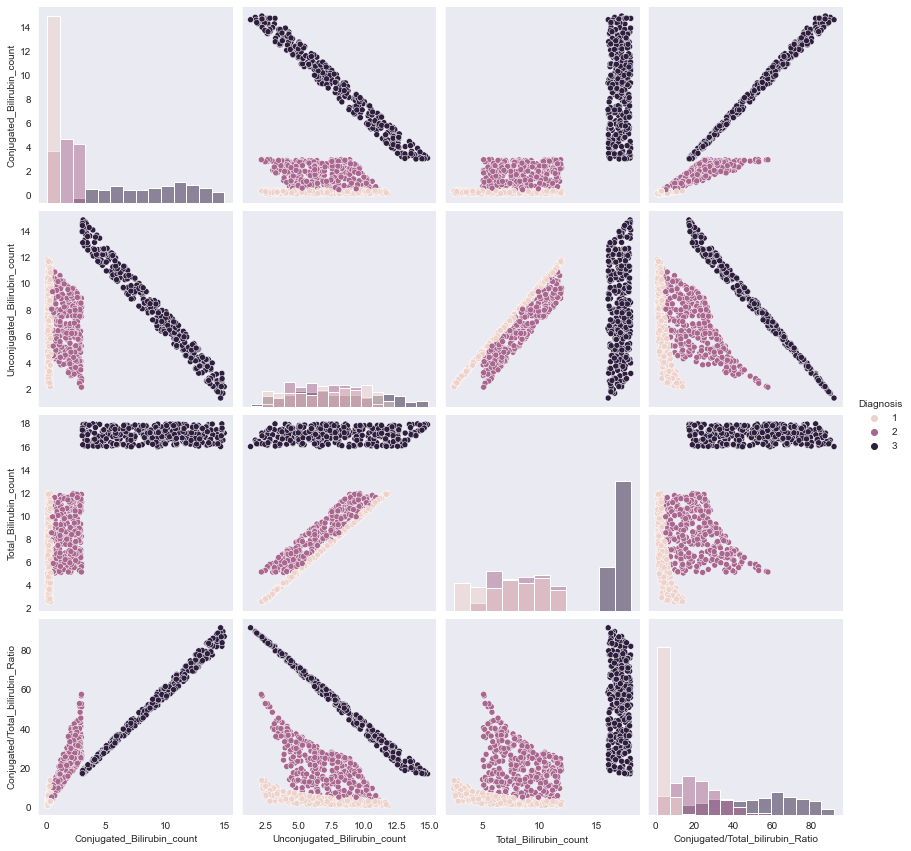

In [30]:
sns.set_style('dark')
sns.pairplot(data=df,vars=['Conjugated_Bilirubin_count','Unconjugated_Bilirubin_count',
                           'Total_Bilirubin_count','Conjugated/Total_bilirubin_Ratio'],hue='Diagnosis',
             height=3,diag_kind='hist')
plt.show()

A clear cut boundaries are visible in the pairplot for the features mentioned above and each classes are distinguisable. Its becuase of the way in which our dataset is created. In real world, this may not be the result....Very Happy to no overlapping of feature values...

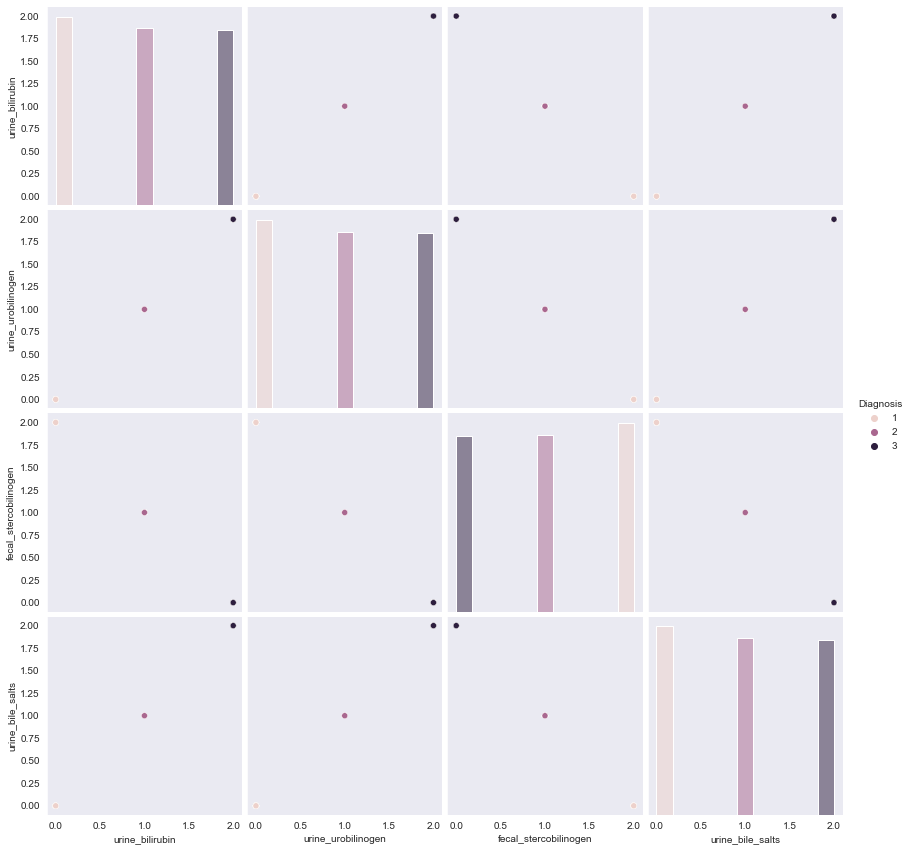

In [31]:
sns.set_style('dark')
sns.pairplot(data=df,vars=['urine_bilirubin','urine_urobilinogen','fecal_stercobilinogen','urine_bile_salts'],hue='Diagnosis',
             height=3,diag_kind='hist')
plt.show()

The pairplot of categorical features are of not much use ...

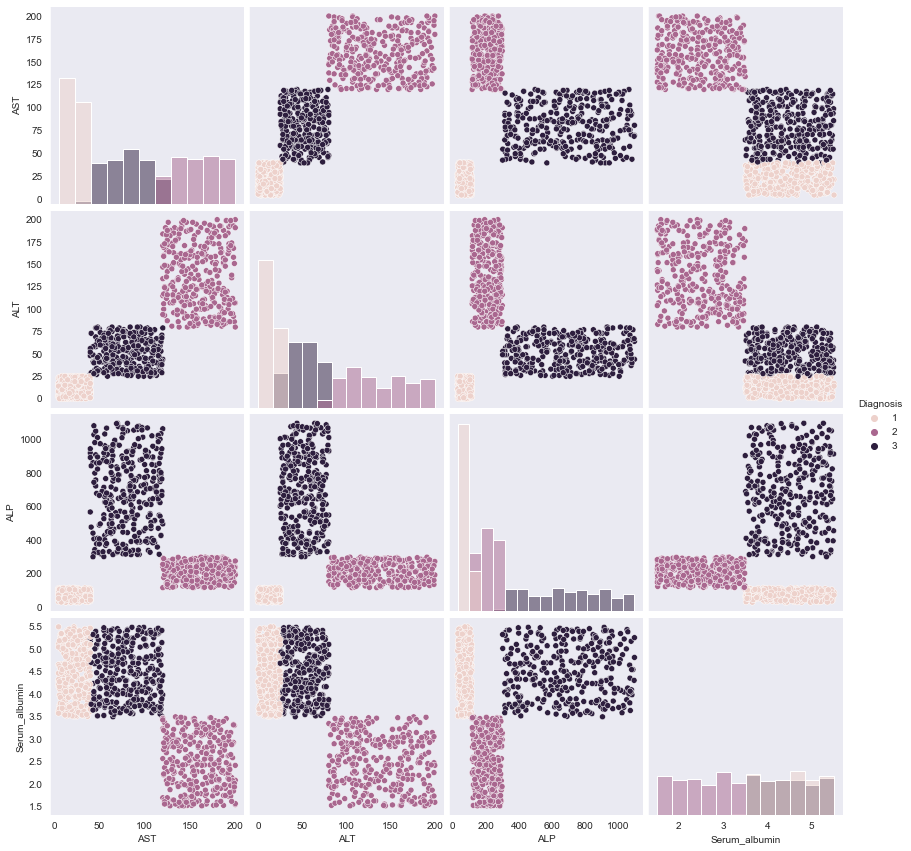

In [32]:
sns.set_style('dark')
sns.pairplot(data=df,vars=['AST', 'ALT', 'ALP', 'Serum_albumin'],hue='Diagnosis',
             height=3,diag_kind='hist')
plt.show()

Again,nice visuals...3 unique groups for each features.....

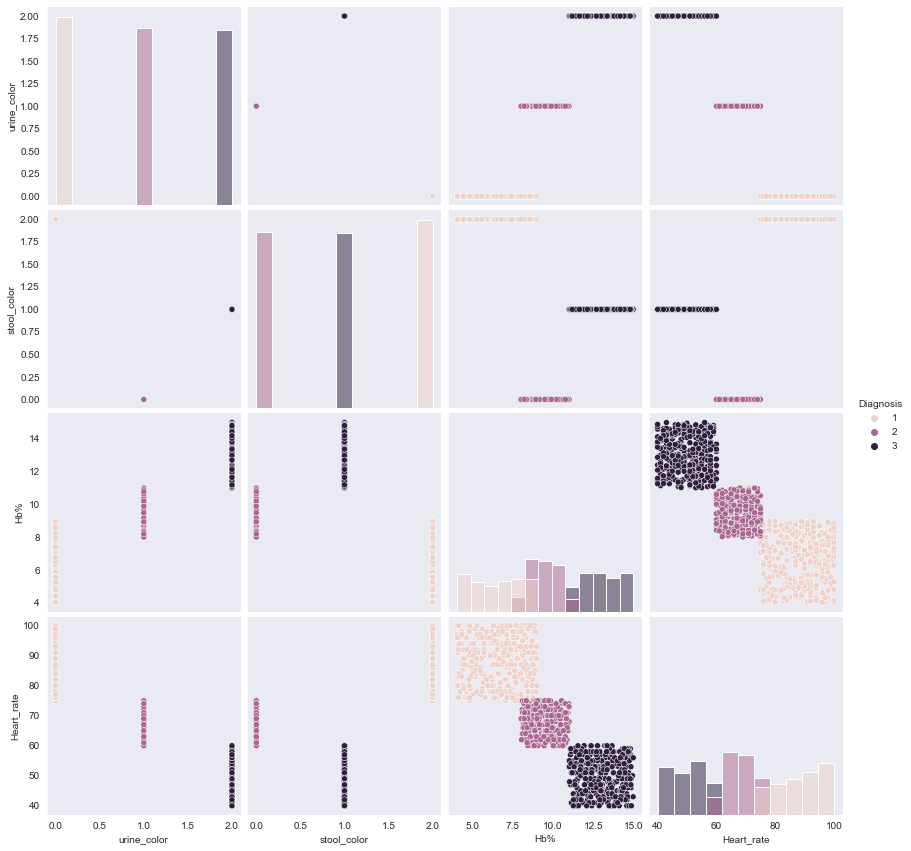

In [33]:
sns.set_style('dark')
sns.pairplot(data=df,vars=['urine_color', 'stool_color','Hb%','Heart_rate'],hue='Diagnosis',
             height=3,diag_kind='hist')
plt.show()

After analysing all these plots,one thing is very clear that the model which I am going to prepare,will be fed with the cleanest data and henceforth, it should predict its diagnosis with 100% accuracy...

Thats it for this notebook...lets wind up the visualization side of the project...in the next notebook, lets dive in to prepare the accurate AI model....."Finger-crossed"